### _Classification : E Commerce Shipping Data_ ###
- I have implemented gradient descent to find the minimum value for cost function that gives the optimum value of w,b for the logistic regression model .

In [2]:
# downloading the dataset using kaggle CLI
! kaggle datasets download prachi13/customer-analytics 

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
100%|█████████████████████████████████████████| 121k/121k [00:00<00:00, 177kB/s]
100%|█████████████████████████████████████████| 121k/121k [00:00<00:00, 177kB/s]


In [3]:
from zipfile import ZipFile
zip_path = '/mnt/c/Personal/VS Code/Python/ECommerceShippingData/customer-analytics.zip'
tgt_path = '/mnt/c/Personal/VS Code/Python/ECommerceShippingData/'
with ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(tgt_path)

In [ ]:
#! pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 12.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt, seaborn as sns,plotly as p,sklearn as s

In [10]:
train_df = pd.read_csv('/mnt/c/Personal/VS Code/Python/ECommerceShippingData/Train.csv')

In [12]:
train_df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


#### _Exploratory data analysis on Shipping Dataset_ ####

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#object describe
train_df.describe(include=['O'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [24]:
#describe numerical
train_df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [74]:
train_df.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [50]:
train_df.Mode_of_Shipment.value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Text(0.5, 1.0, 'PERCENTAGE MODE OF SHIPMENT')

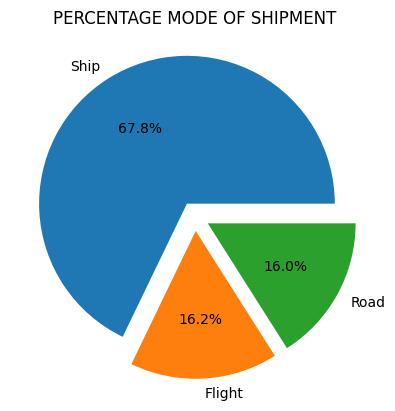

In [66]:
plt.pie(train_df.Mode_of_Shipment.value_counts(),labels=['Ship','Flight','Road'],autopct='%.1f%%',explode=(0.1,0.1,0.1))
plt.title('PERCENTAGE MODE OF SHIPMENT')
